In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dia=pd.read_csv('train.csv',index_col='id')

In [3]:
# Checking for null values and data types
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [4]:
# Double check for nulls
dia.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
dia.cut.value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

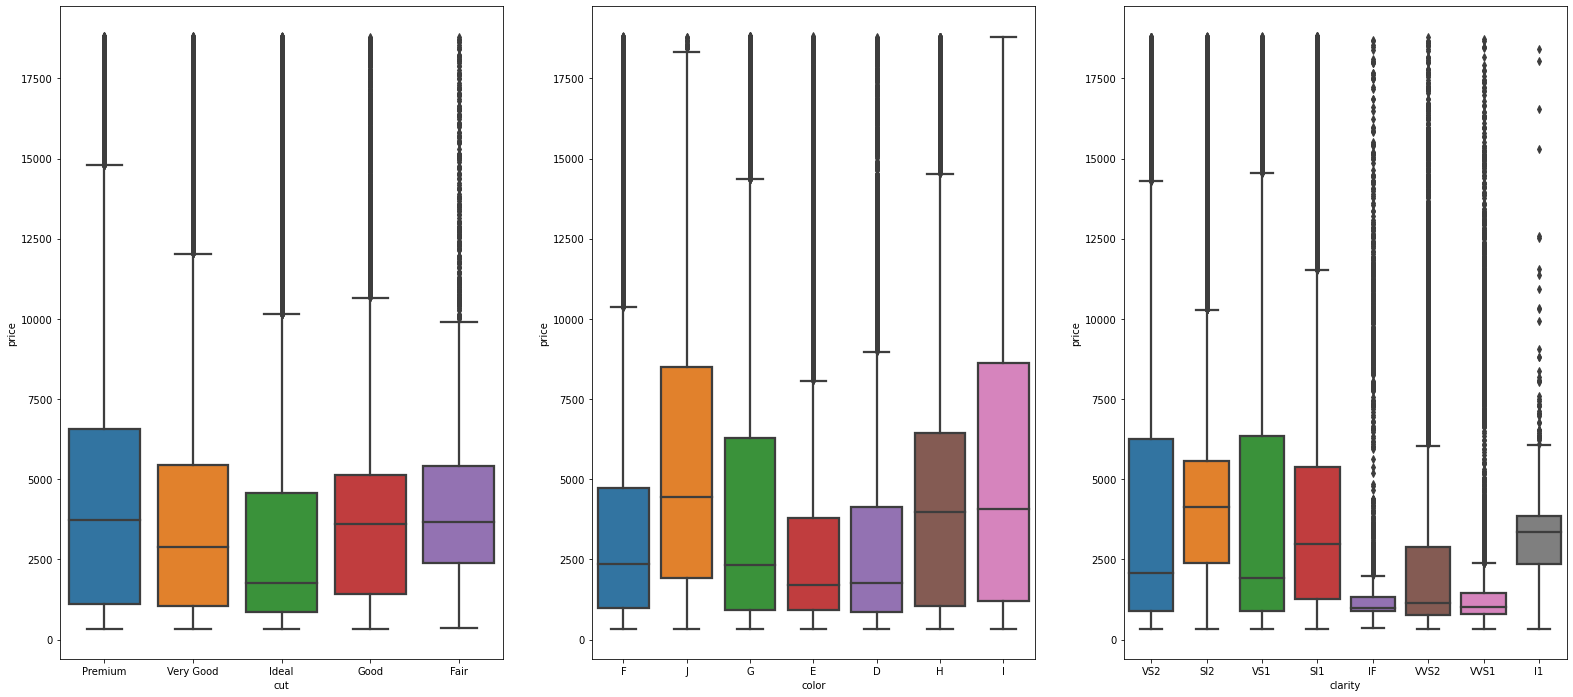

In [6]:
fig,(ax0,ax1,ax2)=plt.subplots(nrows=1,ncols=3)
fig.set_figheight(12)
fig.set_figwidth(27)
sns.set_context('talk')
sns.boxplot(x='cut',y='price',data=dia,ax=ax0)
sns.boxplot(x='color',y='price',data=dia,ax=ax1)
sns.boxplot(x='clarity',y='price',data=dia,ax=ax2)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
#cols=['cut','color','clarity']
#for col in cols:
#    le=LabelEncoder()
#    dia[col]=le.fit_transform(dia[col])

In [12]:
le_cut=LabelEncoder()
le_cut.fit(dia.cut)
dia['cut']=le_cut.transform(dia.cut)

In [13]:
le_color=LabelEncoder()
le_color.fit(dia.color)
dia['color']=le_color.transform(dia.color)

In [14]:
le_clarity=LabelEncoder()
le_clarity.fit(dia.clarity)
dia['clarity']=le_clarity.transform(dia.clarity)

In [15]:
dia.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
63242,0.59,2,4,6,62.0,57.0,5.33,5.37,3.32,1776
104656,1.04,3,3,2,61.1,59.0,6.51,6.54,3.99,5113
124105,0.90,4,2,2,63.1,56.0,6.10,6.04,3.83,4347
26292,0.42,2,3,6,61.1,55.0,4.80,4.85,2.95,724
43710,0.79,4,3,4,62.4,59.0,6.00,6.03,3.74,3548


### Decision Tree Untuned

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [156]:
X=dia.drop(columns='price')
y=dia.price

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [158]:
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [159]:
y_pred=dt.predict(X_test)

In [160]:
from sklearn.metrics import r2_score,mean_squared_error as MSE

In [161]:
r2_score(y_test,y_pred)

0.9754980421529773

In [164]:
MSE(y_test,y_pred)**(0.5)

635.8104397482072

In [119]:
test_frame=X_test.copy()

In [120]:
test_frame['preds']=y_pred

In [121]:
test_frame['actuals']=y_test

In [122]:
test_frame

,carat,cut,color,clarity,depth,table,x,y,z,preds,actuals
id,,,,,,,,,,,
18288,0.33,3,3,5,61.9,58.0,4.42,4.45,2.75,747.696335,743
27851,0.90,4,0,2,59.9,59.0,6.13,6.16,3.69,4271.782537,4381
83253,0.29,4,2,4,60.9,58.0,4.25,4.30,2.60,604.067853,499
83590,0.52,2,0,5,61.4,55.0,5.20,5.20,3.19,1824.564554,1817
130434,1.25,2,1,4,62.6,56.0,6.85,6.86,4.30,9812.113043,10129
...,...,...,...,...,...,...,...,...,...,...,...
131113,0.57,0,5,5,58.3,66.0,5.44,5.35,3.16,1242.755906,1438
18573,1.02,2,5,2,61.7,57.0,6.47,6.44,3.99,4261.750000,4209
10934,1.05,3,4,3,61.3,59.0,6.53,6.47,3.98,4327.556687,4082


In [123]:
dt.fit(X,y)

DecisionTreeRegressor(max_depth=10)

### Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rf=RandomForestRegressor(n_estimators=100)

In [186]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [188]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [189]:
y_pred=rf.predict(X_test)

In [190]:
r2_score(y_test,y_pred)

0.978246982729434

In [191]:
MSE(y_test,y_pred)**(0.5)

603.5916213478267

In [192]:
rf.fit(X,y)

RandomForestRegressor()

In [193]:
pd.Series(rf.feature_importances_,index=X.columns)

carat      0.236852
cut        0.001138
color      0.022573
clarity    0.037265
depth      0.003679
table      0.002633
x          0.004913
y          0.687278
z          0.003668
dtype: float64

## Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [74]:
X=dia.drop(columns='price')
y=dia.price

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [76]:
dt=DecisionTreeRegressor(max_depth=2)
abg=GradientBoostingRegressor(n_estimators=200)

In [77]:
abg.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=200)

In [78]:
y_pred=abg.predict(X_test)

In [79]:
from sklearn.metrics import r2_score,mean_squared_error as MSE

In [80]:
MSE(y_test,y_pred)**(0.5)

616.2038365275014

In [81]:
r2_score(y_test,y_pred)

0.9767543469932396

In [63]:
abg.fit(X,y)

GradientBoostingRegressor(n_estimators=200)

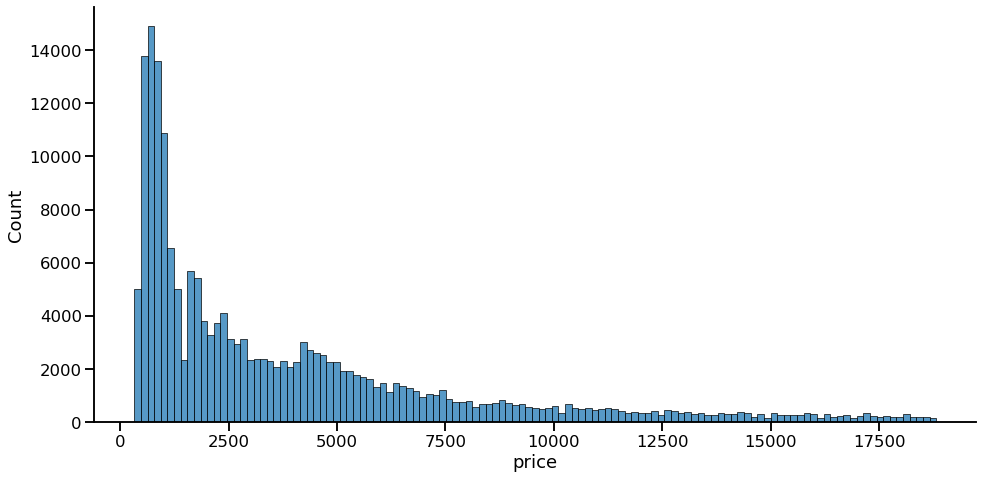

In [95]:
sns.displot(data=dia,x='price',kind='hist',height=7,aspect=2)

10.000000000000002

### Creating Final submission

In [64]:
# Now reading test_set
sub=pd.read_csv('test.csv')

In [65]:
sub.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z
73903,267476,1.05,Ideal,G,VS1,61.9,57.0,6.50,6.57,4.04
2134,195707,1.21,Very Good,H,SI2,62.6,55.9,6.79,6.84,4.26
83989,277562,0.32,Ideal,E,VVS1,62.7,54.0,4.36,4.38,2.74
88973,282546,0.56,Ideal,F,SI1,61.7,55.0,5.28,5.32,3.27
112583,306156,0.31,Ideal,E,VS2,62.3,54.0,4.35,4.38,2.72


In [66]:
sub['color']=le_color.transform(sub.color)
sub['clarity']=le_clarity.transform(sub.clarity) 
sub['cut']=le_cut.transform(sub.cut)

In [67]:
sub

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,2,0,5,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,4,2,3,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,2,5,5,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,2,3,7,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,4,5,5,62.7,56.0,6.75,6.79,4.24
...,...,...,...,...,...,...,...,...,...,...
129045,322618,0.72,2,0,7,62.0,56.0,5.75,5.78,3.57
129046,322619,0.70,3,0,2,59.6,62.0,5.77,5.74,3.43
129047,322620,1.01,3,3,7,62.3,58.0,6.44,6.41,4.01
129048,322621,1.35,2,0,0,62.0,56.0,7.05,7.08,4.38


In [68]:
X_sub=sub.drop(columns='id')

In [69]:
sub['price']=abg.predict(X_sub)

In [70]:
sub_final=sub.loc[:,['id','price']]

In [71]:
sub_final.to_csv('sub_final_gb_200.csv',index=False)

In [72]:
abg

GradientBoostingRegressor(n_estimators=200)